In [76]:
# Importing Necessary Libraries

import io
import math
import base64
import operator
import statistics

import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.ticker as ticker
from IPython.display import HTML, Image

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [77]:
# Loading Food Data

food_data = pd.read_csv("Capital_Area_Food_Bank_Hunger_Estimates.csv")

In [78]:
# Taking an Initial Look at Data

print(food_data.shape)
print(food_data.columns)
print(food_data[food_data.isnull().any(axis=1)])

(1039, 42)
Index(['OBJECTID', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'GEOID10', 'NAME10',
       'NAMELSAD10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10', 'AWATER10',
       'GEOGRAPH', 'TRACT', 'POVERTY200', 'TRACTCE', 'PERCENT_CA',
       'PERCENT_TR', 'PERCENT_WA', 'TOTAL_POP', 'UNEMPLOYME', 'POVERTY_RA',
       'MEDIAN_INC', 'PERCENT_BL', 'PERCENT_HI', 'HOME_OWN', 'F15_FI_RATE',
       'F15_FI_POP', 'F15_LB_NEED', 'F15_LB_UNME', 'F15_DISTRIB', 'F15_PPIN',
       'FY_FI_RATE', 'FY_FI_POP', 'FY_LB_UNME', 'FY_DISTRIB', 'FY_PPIN',
       'F14_FI_RATE', 'F14_LB_UNME', 'F14_DISTRIB', 'F14_PPIN', 'SHAPEAREA',
       'SHAPELEN'],
      dtype='object')
Empty DataFrame
Columns: [OBJECTID, STATEFP10, COUNTYFP10, TRACTCE10, GEOID10, NAME10, NAMELSAD10, MTFCC10, FUNCSTAT10, ALAND10, AWATER10, GEOGRAPH, TRACT, POVERTY200, TRACTCE, PERCENT_CA, PERCENT_TR, PERCENT_WA, TOTAL_POP, UNEMPLOYME, POVERTY_RA, MEDIAN_INC, PERCENT_BL, PERCENT_HI, HOME_OWN, F15_FI_RATE, F15_FI_POP, F15_LB_NEED, F15_LB_UNME, F15_DI

<h3><b>Feature Analysis (Individual)</b></h3>

This section is primarily meant to explore how each of the given features relate solely to the target column, as well as to determine which of the overall features provide the most useful information. Not only this, I will also explore ways they can be improved in order to divulge even more information and assess their contribution to the model generated later in this EDA.


In [79]:
# Looking at Dataset Shape/Head

print('We have {} rows and {} columns.'.format(food_data.shape[0], food_data.shape[1]))
print(food_data.head(2))

We have 1039 rows and 42 columns.
   OBJECTID  STATEFP10  COUNTYFP10  TRACTCE10      GEOID10   NAME10  \
0        26         24          31     703402  24031703402  7034.02   
1        27         24          31     701202  24031701202  7012.02   

             NAMELSAD10 MTFCC10 FUNCSTAT10  ALAND10  ...  FY_FI_POP  \
0  Census Tract 7034.02   G5020          S  1257675  ...   0.000000   
1  Census Tract 7012.02   G5020          S  1841629  ...  87.030944   

     FY_LB_UNME   FY_DISTRIB    FY_PPIN  F14_FI_RATE   F14_LB_UNME  \
0      0.000000     0.000000   0.000000          2.0  12250.272452   
1  14863.288579  3413.209661  39.218346          3.6  17749.107675   

   F14_DISTRIB   F14_PPIN     SHAPEAREA     SHAPELEN  
0      2038.13  29.954845  1.257565e+06  4579.987688  
1      2496.57  25.895904  1.848218e+06  6774.565707  

[2 rows x 42 columns]


The dataset we are using contains the data from the DC area food banks on the food given out at different food banks over several years. There are features such as what was needed by the community and what was sent to the food bank that year. Overall, it consists of 1032 rows and 42 columns throughout. We'll go in depth about each of these individual columns below and analyze whether or not they're going to be useful to our project throughout.

List of Columns: OBJECTID, STATEFP10, COUNTYFP10, TRACTCE10, GEOID10, NAME10, NAMELSAD10, MTFCC10, FUNCSTAT10, ALAND10, AWATER10, GEOGRAPH, TRACT, POVERTY200, TRACTCE, PERCENT_CA, PERCENT_TR, PERCENT_WA, TOTAL_POP, UNEMPLOYME, POVERTY_RA, MEDIAN_INC, PERCENT_BL, PERCENT_HI, HOME_OWN, F15_FI_RATE, F15_FI_POP, F15_LB_NEED, F15_LB_UNME, F15_DISTRIB, F15_PPIN, FY_FI_RATE, FY_FI_POP, FY_LB_UNME, FY_DISTRIB, FY_PPIN, F14_FI_RATE, F14_LB_UNME, F14_DISTRIB, F14_PPIN, SHAPEAREA, SHAPELEN

Sadly, looking at the list of columns in the data, we were never really given a description of what some of these features refer to. I'll separate them in the list below based on what information we are able to go and derive based on the name and, following, information that we're unsure about.

<ul>
    <b>ID Columns</b>
    <li>ObjectID (int64): The unique ID of the row/item being discussed</li>
    <li>StateFP10 (int64): The state ID of the row/item being discussed</li>
    <li>CountyFP10 (int64): The county ID of the row/item being discussed</li>
    <li>TractFP10 (int64): The tract ID of the row/item being discussed</li>
    <li>GeoID10 (int64): The geographic ID of the row/item being discussed</li>
    <li>Name10 (float): The name of the row/item being discussed</li>
    <li>NameLSad10 (object): The longer/more descriptive name of the row/item</li>
</ul>

These columns specifically go and refer to the individual name/ID of the land/tract/etc. being discussed in the row throughout. Each of these values mentioned above act as an identifier that specifically helps to distinguish the item described from those whom might be similar regarding other traits.

<ul>
    <b>Attribute Columns</b>
    <li>ALand10 (int64): Land area of the row/item being discussed</li>
    <li>AWater10 (int64): Water area of the row/item being discussed</li>
    <li>TotalPop (int64): Total population of the row/item being discussed</li>
    <li>Unemployme (float): Unemployment rate of the row/item being discussed</li>
    <li>PovertyRa (float): Poverty rate of the row/item being discussed</li>
    <li>MedianInc (float): Median income of the row/item being discussed</li>
    <li>PercentBl (float): Percentage of African-Americans who live in the row/item being discussed</li>
    <li>PercentHi (float): Percentage of Hispanics who live in the row/item being discussed</li>
    <li>HomeOwn (float): Percentage of homeowners who live in the row/item being discussed</li>
</ul>

These columns delve further into the traits/attributes that help to characterize the land/tract/etc. being discussed in the row throughout. These features in particular will probably be some of those that help the most with feature engineering in particular, as they're the ones that specifically differentiate the pieces of land from each other with regards to demographics, helping us to get further insights into the population and individuals that live there.

<ul>
    <b>Food/Distribution Columns</b>
    <li>Fx_FI_Rate (float): The estimated portion of the population in the census tract experiencing food insecurity</li>
    <li>Fx_FI_Pop (float): The estimated number of people in the census tract experiencing food insecurity</li>
    <li>Fx_LB_Need (float): The estimated pounds of food needed by the food insecure population in the census tract</li>
    <li>Fx_Distrib (float): The number of pounds of food distributed by CAFB and partners in the census tract</li>
    <li>Fx_LB_Unme (float): The difference between the estimated pounds of food needed and the real pounds of food distributed</li>
</ul>

These columns are perhaps the most important, as they specifically have to do with the target variable that we'll select/look into. The column 'Fx_LB_Unme' will perhaps be later selected to be the target, as it in particular deals with the either the amount of unnecessary food delivered or the amount of food lacking throughout.

<ul>
    <b>Unknown Columns</b>
    <li>MTFCC10 (object): Seems like another ID value but not completely sure.</li>
    <li>FuncStat10 (object): Seems like another either ID value or attribute but not completey sure</li>
</ul>

Both of these columns don't seem to be that important at all, and don't offer much information throughout from what I can tell. Unless I find out that they're incredibly valuable as a whole when I look into analysis further, I'm probably going to drop them from consideration regarding any models built.

<ul>
    <b>Unknown Columns</b>
    <li>Percent_CA (object): Seems like an attribute column, could be useful for feature engineering</li>
    <li>Percent_TR (object): Seems like an attribute column, could be useful for feature engineering</li>
    <li>Percent_WA (object): Seems like an attribute column, could be useful for feature engineering</li>
</ul>

These columns are definitely attributes of a given census tract, but there's no indication of what they stand for. Nevertheless, they'll probably come in handy when taking feature engineering into consideration.

In [80]:
num_cols = food_data._get_numeric_data().columns
categorical_columns = list(set(food_data.columns) - set(num_cols))
categorical_columns

['NAMELSAD10', 'MTFCC10', 'FUNCSTAT10']

As mentioned above, I'm just going to remove each of the columns above. We have no idea what 'MTFCC10' and 'FUNCSTAT10' refer to, and it seems like all the information to be gained from 'NAMELSAD10' is contained in the abbreviated 'NAME' column. There's nothing further to be gained from simply encoding each individual value in 'NAMELSAD10', given that there won't be any overlap.

In [81]:
# Remove unnecessary columns 

food_data.drop(['FUNCSTAT10', 'NAMELSAD10', 'MTFCC10'], inplace=True, axis=1)

The next thing I'm going to do is look into the 'Attribute' columns, as described above. Each of these individual columns help to describe an individual feature of a census tract, which can be instrumental when looking into the needs of each tract in their entirety, given that we want to help prevent unnecessary waste and improve distribution throughout.

In [82]:
attribute_cols = ["ALAND10", "AWATER10", "PERCENT_CA", "PERCENT_TR", "PERCENT_WA", "TOTAL_POP", "UNEMPLOYME", 
                  "POVERTY_RA", "MEDIAN_INC", "PERCENT_BL", "PERCENT_HI", "HOME_OWN"]

tract_attributes = food_data[attribute_cols]

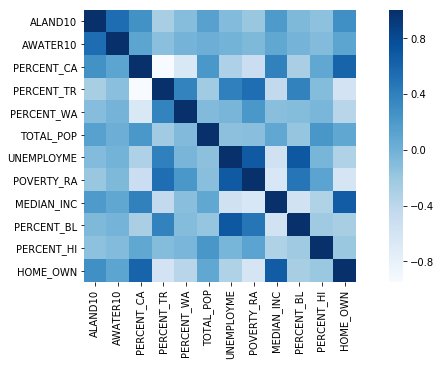

In [83]:
# Assess Correlation of Data
%matplotlib inline

f = plt.figure(figsize=(12, 5))
correlation = tract_attributes.corr()
graph = sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), cmap="Blues", square=True)

To no surprise, there's quite a correlation between both 'MEDIAN_INC' and 'HOME_OWN' as well as 'POVERTY_RA' and 'UNEMPLOYME', as these are stats that you'd expect to correlate, given their inherent nature. I'll continue to look further into the data and build a few features that could help us further - **[TBD]**.

Looking into the data further, we're going to use the "F15_LB_NEED" column as the target. As such, we're going to need to drop the similar columns in order to prevent leakage. Besides this, we can get rid of all the unnecessary "ID" columns throughout, as they probably won't provide too much helpful information for the model.

In [84]:
columns_to_drop = ["F15_LB_UNME", "FY_FI_RATE", "FY_FI_POP", 
                   "FY_LB_UNME", "FY_DISTRIB", "FY_PPIN", "OBJECTID", 
                   "STATEFP10", "COUNTYFP10", "TRACTCE10", "GEOID10", 
                   "NAME10"]

for col in columns_to_drop:
    food_data.drop(col, inplace=True, axis=1)

Next, I'll go and create a simple model so that we can get a baseline score for the dataset throughout, without any feature engineering or advanced models throughout. I don't expect this score to be any good, given that the established columns provided don't seem too predictive as a whole just yet.

In [85]:
train_y = food_data['F15_LB_NEED'].values
train_x = food_data.drop('F15_LB_NEED', axis=1)
xtra, xte, ytra, yte = train_test_split(
    train_x, train_y, test_size=0.2)

rf_params = {}
rf_model = RandomForestRegressor()
rf_model.fit(xtra, ytra)
train_preds = rf_model.predict(xte)

print("Current R2: {}".format(r2_score(yte, train_preds)))

Current R2: 0.9977191990472702


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


It looks like I missed some leakage. There's definitely one column that's extremely predictive that is used to go and calculate the correct amount of food for each census tract. Let's go and look into the RandomForest feature importances and see which feature it happens to be.

In [86]:
feature_importances = pd.DataFrame(
    rf_model.feature_importances_, index = train_x.columns,
    columns=['importance']).sort_values('importance', ascending=False)

feature_importances[:1]

,importance
F15_FI_POP,0.996514


As expected, one column happens to be extremely predictive; in this case it happens to be "F15_FI_Pop", which refers to the estimated number of people in the census tract whom happen to be experiencing food insecurity. I expect what happens is that the individuals whom decide how much food is needed simply multiply the total population in need by a scalar value. Realizing this, we now have to go and change up what we're trying to predict/work with, as there's no point in predicting a static value that explicitly is based off another value. However, although we may still change things up, we'll also go and repeat the same methodology as above, except with the "F15_FI_Pop" column removed. This will allow for us to get a feel for the overall predictiveness of the other features.

In [90]:
food_data = food_data.drop(["F15_FI_POP", "F14_LB_UNME"], axis=1)

train_y = food_data['F15_LB_NEED'].values
train_x = food_data.drop('F15_LB_NEED', axis=1)
xtra, xte, ytra, yte = train_test_split(
    train_x, train_y, test_size=0.2)

rf_params = {}
rf_model = RandomForestRegressor()
rf_model.fit(xtra, ytra)
train_preds = rf_model.predict(xte)

print("Current R2: {}".format(r2_score(yte, train_preds)))

Current R2: 0.9619844987062772


c:\users\student\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
feature_importances = pd.DataFrame(
    rf_model.feature_importances_, index = train_x.columns,
    columns=['importance']).sort_values('importance', ascending=False)

feature_importances[:5]

,importance
F15_DISTRIB,0.390646
F15_FI_RATE,0.363532
TOTAL_POP,0.100499
F14_DISTRIB,0.082679
F15_PPIN,0.031479


That's a little more useful, as the overall distribution/rate seems to correlate with the overall need as a whole. We're probably still going to go and modify our target in order to predict a more useful statistic--probably the amount of wasted/unmet food so that CAFB and partners can optimize their overall distribution.